In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd

Datasets Directory

In [2]:
DIR = './data'

Function to load zipped datasets

In [3]:
def load_data(file_name, head = 500):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data

Load and display sample records of books ~/authors/works/series~

In [4]:
books = load_data(os.path.join(DIR, 'goodreads_books_mystery_thriller_crime.json.gz'), 5000)
reviews = load_data(os.path.join(DIR, 'goodreads_reviews_mystery_thriller_crime.json.gz'), 5000)

In [5]:
print(' == sample record (books) ==')
np.random.choice(books)

 == sample record (books) ==


{'isbn': '0440209994',
 'text_reviews_count': '5',
 'series': ['182203'],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '30', 'name': 'to-read'},
  {'count': '11', 'name': 'mystery'},
  {'count': '6', 'name': 'mysteries'},
  {'count': '3', 'name': 'california'},
  {'count': '3', 'name': 'dunlap-susan'},
  {'count': '2', 'name': 'currently-reading'},
  {'count': '2', 'name': 'mystery-thriller'},
  {'count': '1', 'name': 'store'},
  {'count': '1', 'name': 'reading-in-my-50s'},
  {'count': '1', 'name': 'reading-in-my-20s'},
  {'count': '1', 'name': 'e-books-to-read'},
  {'count': '1', 'name': 'paperwhite'},
  {'count': '1', 'name': 'a_owned'},
  {'count': '1', 'name': 'audiobook'},
  {'count': '1', 'name': '1a'},
  {'count': '1', 'name': 'american'},
  {'count': '1', 'name': '1980s'},
  {'count': '1', 'name': 'books'},
  {'count': '1', 'name': 'books-acquired'},
  {'count': '1', 'name': 'afic-mystery'},
  {'count': '1', 'name': 'investigating'},
  {'count': '

> {'count': '1', 'name': 'لمعرض-الكتاب-2018'},
> 
> 'title': 'Човекът, който знаеше всичко',

auch nicht lateinische Buchstaben! Übersetzen? löschen?

In [6]:
display(type(books[0]))
display(len(books[0]))
display(books[0])

dict

29

{'isbn': '184737297X',
 'text_reviews_count': '15',
 'series': ['169353'],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '159', 'name': 'to-read'},
  {'count': '12', 'name': 'historical-fiction'},
  {'count': '11', 'name': 'mystery'},
  {'count': '10', 'name': 'historical-mystery'},
  {'count': '7', 'name': 'medieval'},
  {'count': '6', 'name': 'historical'},
  {'count': '5', 'name': 'crime'},
  {'count': '3', 'name': 'series'},
  {'count': '3', 'name': 'ebook'},
  {'count': '3', 'name': 'fiction'},
  {'count': '3', 'name': 'crowner-john'},
  {'count': '2', 'name': 'default'},
  {'count': '2', 'name': 'books'},
  {'count': '2', 'name': 'owned'},
  {'count': '2', 'name': 'mystery-thrillers'},
  {'count': '2', 'name': 'c'},
  {'count': '2', 'name': 'library'},
  {'count': '2', 'name': 'wish-list'},
  {'count': '2', 'name': 'england'},
  {'count': '2', 'name': 'medieval-england'},
  {'count': '2', 'name': 'mystery-historical'},
  {'count': '2', 'name': 'audio

In [7]:
len(books)

5001

In [8]:
df_books = pd.DataFrame(books)
df_reviews = pd.DataFrame(reviews)

In [9]:
df_books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,184737297X,15,[169353],US,,"[{'count': '159', 'name': 'to-read'}, {'count'...",,false,3.93,B007YLTG5I,...,4,,2009,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
1,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,...,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",B01ALOWJN0,true,3.49,B01ALOWJN0,...,,,,https://www.goodreads.com/book/show/29074697-t...,https://s.gr-assets.com/assets/nophoto/book/11...,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
3,0854563903,8,[408775],US,,"[{'count': '51', 'name': 'to-read'}, {'count':...",,false,3.30,,...,12,Large Print,1975,https://www.goodreads.com/book/show/1902202.De...,https://s.gr-assets.com/assets/nophoto/book/11...,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
4,8838920931,3,[274410],US,ita,"[{'count': '48', 'name': 'to-read'}, {'count':...",,false,3.54,,...,,,2006,https://www.goodreads.com/book/show/9671977-ar...,https://images.gr-assets.com/books/1474788304m...,9671977,22,2152906,Aristotele e i misteri di Eleusi,Aristotele e i misteri di Eleusi


In [10]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   isbn                  5001 non-null   object
 1   text_reviews_count    5001 non-null   object
 2   series                5001 non-null   object
 3   country_code          5001 non-null   object
 4   language_code         5001 non-null   object
 5   popular_shelves       5001 non-null   object
 6   asin                  5001 non-null   object
 7   is_ebook              5001 non-null   object
 8   average_rating        5001 non-null   object
 9   kindle_asin           5001 non-null   object
 10  similar_books         5001 non-null   object
 11  description           5001 non-null   object
 12  format                5001 non-null   object
 13  link                  5001 non-null   object
 14  authors               5001 non-null   object
 15  publisher             5001 non-null   

In [11]:
df_reviews.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,6392944,5e212a62bced17b4dbe41150e5bb9037,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,Mon Jul 24 00:00:00 -0700 2017,6,0
1,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
2,8842281e1d1347389f2ab93d60773d4d,32283133,8e4d61801907e591018bdc3442a9cf2b,0,http://www.telegraph.co.uk/culture/10...,Tue Nov 01 11:09:18 -0700 2016,Tue Nov 01 11:09:44 -0700 2016,,,9,0
3,8842281e1d1347389f2ab93d60773d4d,17860739,022bb6daffa49adc27f6b20b6ebeb37d,4,An amazing and unique creation: JJ Abrams and ...,Wed Mar 26 13:51:30 -0700 2014,Tue Sep 23 01:44:36 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,Sat Jul 26 00:00:00 -0700 2014,7,0
4,8842281e1d1347389f2ab93d60773d4d,8694005,0e317947e1fd341f573192111bb2921d,3,The Name of the Rose is a thrilling Dan Brown-...,Wed Sep 08 01:22:27 -0700 2010,Wed Dec 14 12:30:43 -0800 2016,Mon Aug 10 00:00:00 -0700 2015,Mon Jul 20 00:00:00 -0700 2015,17,6


In [12]:
df_books.describe()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
count,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001,...,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001
unique,3017,320,2825,1,51,4659,1148,2,219,2664,...,13,250,87,5001,3073,5001,909,4624,4850,4850
top,,1,[],US,eng,"[{'count': '107382', 'name': 'to-read'}, {'cou...",,false,3.91,,...,,,,https://www.goodreads.com/book/show/26708400-a...,https://s.gr-assets.com/assets/nophoto/book/11...,2588538,1,3311984,The Woman in White,The Woman in White
freq,1985,806,1938,5001,1903,7,3854,3479,89,2252,...,1785,4476,1258,1,1929,1,161,7,7,7


nur 275 unique ISBNs, 123 ASIN... hm. ISBN sollte eigentlich schon überall gesetzt sein..

In [13]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

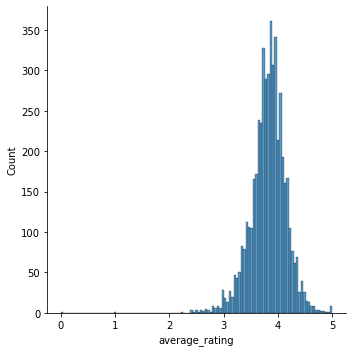

In [14]:
sns.displot(df_books["average_rating"].astype(float))

In [15]:
df_books.style.highlight_max(axis=1)
df_books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,184737297X,15,[169353],US,,"[{'count': '159', 'name': 'to-read'}, {'count'...",,false,3.93,B007YLTG5I,...,4,,2009,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
1,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,...,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",B01ALOWJN0,true,3.49,B01ALOWJN0,...,,,,https://www.goodreads.com/book/show/29074697-t...,https://s.gr-assets.com/assets/nophoto/book/11...,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
3,0854563903,8,[408775],US,,"[{'count': '51', 'name': 'to-read'}, {'count':...",,false,3.30,,...,12,Large Print,1975,https://www.goodreads.com/book/show/1902202.De...,https://s.gr-assets.com/assets/nophoto/book/11...,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
4,8838920931,3,[274410],US,ita,"[{'count': '48', 'name': 'to-read'}, {'count':...",,false,3.54,,...,,,2006,https://www.goodreads.com/book/show/9671977-ar...,https://images.gr-assets.com/books/1474788304m...,9671977,22,2152906,Aristotele e i misteri di Eleusi,Aristotele e i misteri di Eleusi


In [16]:
# b = a['popular_shelves'].apply(pd.Series).merge(a, left_index = True, right_index = True).drop(['popular_shelves',0], axis = 1)
# b.head()


In [17]:
# b.info()

duplicates definitely need to be removed beforehand.
- how to find all of them?
- [ ] same title
- [ ] same kindle_asin
- [ ] very close title (how?)
- [ ] how to combine them? reviews? create an extra index? so the review don't get lost?

In [18]:
# pd.concat(g for _, g in df_books.groupby("title") if len(g) > 1)


In [19]:
df_books.set_index("book_id", inplace=True)
df_reviews.set_index("review_id", inplace=True)

In [20]:
df_reviews

,user_id,book_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
review_id,,,,,,,,,,
5e212a62bced17b4dbe41150e5bb9037,8842281e1d1347389f2ab93d60773d4d,6392944,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,Mon Jul 24 00:00:00 -0700 2017,6,0
2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
8e4d61801907e591018bdc3442a9cf2b,8842281e1d1347389f2ab93d60773d4d,32283133,0,http://www.telegraph.co.uk/culture/10...,Tue Nov 01 11:09:18 -0700 2016,Tue Nov 01 11:09:44 -0700 2016,,,9,0
022bb6daffa49adc27f6b20b6ebeb37d,8842281e1d1347389f2ab93d60773d4d,17860739,4,An amazing and unique creation: JJ Abrams and ...,Wed Mar 26 13:51:30 -0700 2014,Tue Sep 23 01:44:36 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,Sat Jul 26 00:00:00 -0700 2014,7,0
0e317947e1fd341f573192111bb2921d,8842281e1d1347389f2ab93d60773d4d,8694005,3,The Name of the Rose is a thrilling Dan Brown-...,Wed Sep 08 01:22:27 -0700 2010,Wed Dec 14 12:30:43 -0800 2016,Mon Aug 10 00:00:00 -0700 2015,Mon Jul 20 00:00:00 -0700 2015,17,6
...,...,...,...,...,...,...,...,...,...,...
da3afde4e35be07556d25941be8e7594,5da7f0c9d042ac1bd51a7f1e08bbf6a3,30653727,5,"In This Grave Hour, #13 in the Maisie Dobbs my...",Sun Mar 12 20:21:26 -0700 2017,Wed Jul 19 10:11:54 -0700 2017,Mon Jul 17 00:00:00 -0700 2017,,0,0
9f48ba1335588f5e2b02d5e4427ff611,5da7f0c9d042ac1bd51a7f1e08bbf6a3,2634424,3,I read this for a book club assignment. I have...,Wed Feb 01 23:25:00 -0800 2017,Wed Feb 01 23:28:30 -0800 2017,Wed Feb 01 00:00:00 -0800 2017,,0,1
3e339a97bcd6fbb35b90a33df5a525fe,5da7f0c9d042ac1bd51a7f1e08bbf6a3,30508247,4,I love the Laurie King's Mary Russell characte...,Fri Jan 27 10:54:30 -0800 2017,Fri Jan 27 11:00:11 -0800 2017,Thu Jan 26 00:00:00 -0800 2017,,0,0


In [21]:
df_reviews.groupby(level=0).filter(lambda x: len(x) > 1).head()


,user_id,book_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
review_id,,,,,,,,,,


## Column cleaning

In [22]:
df_reviews.drop(columns=['review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], inplace=True)

In [23]:
df_reviews.head()

,user_id,book_id,rating
review_id,,,
5e212a62bced17b4dbe41150e5bb9037,8842281e1d1347389f2ab93d60773d4d,6392944,3
2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,3
8e4d61801907e591018bdc3442a9cf2b,8842281e1d1347389f2ab93d60773d4d,32283133,0
022bb6daffa49adc27f6b20b6ebeb37d,8842281e1d1347389f2ab93d60773d4d,17860739,4
0e317947e1fd341f573192111bb2921d,8842281e1d1347389f2ab93d60773d4d,8694005,3


In [24]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 6066814 to 26114327
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   isbn                  5001 non-null   object
 1   text_reviews_count    5001 non-null   object
 2   series                5001 non-null   object
 3   country_code          5001 non-null   object
 4   language_code         5001 non-null   object
 5   popular_shelves       5001 non-null   object
 6   asin                  5001 non-null   object
 7   is_ebook              5001 non-null   object
 8   average_rating        5001 non-null   object
 9   kindle_asin           5001 non-null   object
 10  similar_books         5001 non-null   object
 11  description           5001 non-null   object
 12  format                5001 non-null   object
 13  link                  5001 non-null   object
 14  authors               5001 non-null   object
 15  publisher             5001 non-nu

In [25]:
df_books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,isbn13,publication_month,edition_information,publication_year,url,image_url,ratings_count,work_id,title,title_without_series
book_id,,,,,,,,,,,,,,,,,,,,,
6066814,184737297X,15,[169353],US,,"[{'count': '159', 'name': 'to-read'}, {'count'...",,false,3.93,B007YLTG5I,...,9781847372970,4,,2009,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
33394837,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,...,,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
29074697,,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",B01ALOWJN0,true,3.49,B01ALOWJN0,...,,,,,https://www.goodreads.com/book/show/29074697-t...,https://s.gr-assets.com/assets/nophoto/book/11...,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
1902202,0854563903,8,[408775],US,,"[{'count': '51', 'name': 'to-read'}, {'count':...",,false,3.30,,...,9780854563906,12,Large Print,1975,https://www.goodreads.com/book/show/1902202.De...,https://s.gr-assets.com/assets/nophoto/book/11...,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
9671977,8838920931,3,[274410],US,ita,"[{'count': '48', 'name': 'to-read'}, {'count':...",,false,3.54,,...,9788838920936,,,2006,https://www.goodreads.com/book/show/9671977-ar...,https://images.gr-assets.com/books/1474788304m...,22,2152906,Aristotele e i misteri di Eleusi,Aristotele e i misteri di Eleusi


In [26]:
df_books[df_books['country_code'].notna() == False]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,isbn13,publication_month,edition_information,publication_year,url,image_url,ratings_count,work_id,title,title_without_series
book_id,,,,,,,,,,,,,,,,,,,,,


In [27]:
df_books = df_books[['title', 'text_reviews_count', 'popular_shelves', 'average_rating']]
df_books.head()

,title,text_reviews_count,popular_shelves,average_rating
book_id,,,,
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"[{'count': '159', 'name': 'to-read'}, {'count'...",3.93
33394837,The House of Memory (Pluto's Snitch #2),60,"[{'count': '54', 'name': 'currently-reading'},...",4.33
29074697,The Slaughtered Virgin of Zenopolis (Inspector...,23,"[{'count': '90', 'name': 'to-read'}, {'count':...",3.49
1902202,"Dead in the Morning (Patrick Grant, #1)",8,"[{'count': '51', 'name': 'to-read'}, {'count':...",3.30
9671977,Aristotele e i misteri di Eleusi,3,"[{'count': '48', 'name': 'to-read'}, {'count':...",3.54


In [28]:
df_books = df_books.astype({"title": 'string', "text_reviews_count": np.uint, 'average_rating': np.float64})


In [29]:
df_books.head()

,title,text_reviews_count,popular_shelves,average_rating
book_id,,,,
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"[{'count': '159', 'name': 'to-read'}, {'count'...",3.93
33394837,The House of Memory (Pluto's Snitch #2),60,"[{'count': '54', 'name': 'currently-reading'},...",4.33
29074697,The Slaughtered Virgin of Zenopolis (Inspector...,23,"[{'count': '90', 'name': 'to-read'}, {'count':...",3.49
1902202,"Dead in the Morning (Patrick Grant, #1)",8,"[{'count': '51', 'name': 'to-read'}, {'count':...",3.30
9671977,Aristotele e i misteri di Eleusi,3,"[{'count': '48', 'name': 'to-read'}, {'count':...",3.54


In [30]:
df_books.dtypes

title                  string
text_reviews_count     uint32
popular_shelves        object
average_rating        float64
dtype: object

todo: für weitere untersuchungen (Genres) _popular shelves_ noch weiter exploden

In [31]:
df_books.explode('popular_shelves')

,title,text_reviews_count,popular_shelves,average_rating
book_id,,,,
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"{'count': '159', 'name': 'to-read'}",3.93
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"{'count': '12', 'name': 'historical-fiction'}",3.93
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"{'count': '11', 'name': 'mystery'}",3.93
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"{'count': '10', 'name': 'historical-mystery'}",3.93
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"{'count': '7', 'name': 'medieval'}",3.93
...,...,...,...,...
26114327,"Obsession Falls (Virtue Falls, #2)",11,"{'count': '1', 'name': 'mysteries-surprise-end...",3.77
26114327,"Obsession Falls (Virtue Falls, #2)",11,"{'count': '1', 'name': 'murder-mysteries'}",3.77
26114327,"Obsession Falls (Virtue Falls, #2)",11,"{'count': '1', 'name': 'aaa-books-2017'}",3.77


---

In [32]:
# Utility to split the data into training and test sets.
def split_dataframe(df, holdout_fraction=0.2):
  """Splits a DataFrame into training and test sets.
  Args:
    df: a dataframe.
    holdout_fraction: fraction of dataframe rows to use in the test set.
  Returns:
    train: dataframe for training
    test: dataframe for testing
  """
  test = df.sample(frac=holdout_fraction, replace=False)
  train = df[~df.index.isin(test.index)]
  return train, test

---

# Recommender System

In [33]:
import tensorflow as tf
import tensorflow_recommenders as tfrs

## Model

ratings:
`<MapDataset shapes: {movie_title: (), user_id: ()}, types: {movie_title: tf.string, user_id: tf.string}>`

`{'movie_title': <tf.Tensor: shape=(), dtype=string, numpy=b"One Flew Over the Cuckoo's Nest (1975)">, 'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'138'>}`

movies:
`<MapDataset shapes: (), types: tf.string>`

`tf.Tensor(b'You So Crazy (1994)', shape=(), dtype=string)`


sprich: 
user (ratings): 1:1 Titel <-> UserID
item: nur Titel

In [34]:
from typing import Dict, Text

class GoodReadsModel(tfrs.Model):
  # We derive from a custom base class to help reduce boilerplate. Under the hood,
  # these are still plain Keras Models.

  def __init__(
      self,
      user_model: tf.keras.Model,
      book_model: tf.keras.Model,
      task: tfrs.tasks.Retrieval):
    super().__init__()

    # Set up user and movie representations.
    self.user_model = user_model
    self.book_model = book_model

    # Set up a retrieval task.
    self.task = task

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    # Define how the loss is computed.

    user_embeddings = self.user_model(features['user_id'])
    movie_embeddings = self.book_model(features['book_id'])

    return self.task(user_embeddings, movie_embeddings)

Build vocabularies to convert user ids and movie titles into integer indices for embedding layers:

In [35]:
df_books.head(2)

,title,text_reviews_count,popular_shelves,average_rating
book_id,,,,
6066814,"Crowner Royal (Crowner John Mystery, #13)",15,"[{'count': '159', 'name': 'to-read'}, {'count'...",3.93
33394837,The House of Memory (Pluto's Snitch #2),60,"[{'count': '54', 'name': 'currently-reading'},...",4.33


In [36]:
book_ids = df_books.index
book_ids

Index(['6066814', '33394837', '29074697', '1902202', '9671977', '16158998',
       '25162836', '2805495', '22722787', '16158996',
       ...
       '17978149', '17978144', '17667189', '3429795', '606991', '18669319',
       '13599705', '6530667', '6530669', '26114327'],
      dtype='object', name='book_id', length=5001)

In [37]:
user_ids = df_reviews['user_id']
user_ids

review_id
5e212a62bced17b4dbe41150e5bb9037    8842281e1d1347389f2ab93d60773d4d
2ede853b14dc4583f96cf5d120af636f    8842281e1d1347389f2ab93d60773d4d
8e4d61801907e591018bdc3442a9cf2b    8842281e1d1347389f2ab93d60773d4d
022bb6daffa49adc27f6b20b6ebeb37d    8842281e1d1347389f2ab93d60773d4d
0e317947e1fd341f573192111bb2921d    8842281e1d1347389f2ab93d60773d4d
                                                  ...               
da3afde4e35be07556d25941be8e7594    5da7f0c9d042ac1bd51a7f1e08bbf6a3
9f48ba1335588f5e2b02d5e4427ff611    5da7f0c9d042ac1bd51a7f1e08bbf6a3
3e339a97bcd6fbb35b90a33df5a525fe    5da7f0c9d042ac1bd51a7f1e08bbf6a3
2c267a9b68bfd1f0f39e6b6397d472a6    5da7f0c9d042ac1bd51a7f1e08bbf6a3
c296dca609072c43eba74cb87c8edad9    5da7f0c9d042ac1bd51a7f1e08bbf6a3
Name: user_id, Length: 5001, dtype: object

In [38]:
df_reviews.head()

,user_id,book_id,rating
review_id,,,
5e212a62bced17b4dbe41150e5bb9037,8842281e1d1347389f2ab93d60773d4d,6392944,3
2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,3
8e4d61801907e591018bdc3442a9cf2b,8842281e1d1347389f2ab93d60773d4d,32283133,0
022bb6daffa49adc27f6b20b6ebeb37d,8842281e1d1347389f2ab93d60773d4d,17860739,4
0e317947e1fd341f573192111bb2921d,8842281e1d1347389f2ab93d60773d4d,8694005,3


In [39]:
user_ids.unique()

array(['8842281e1d1347389f2ab93d60773d4d',
       '72fb0d0087d28c832f15776b0d936598',
       '7504b2aee1ecb5b2872d3da381c6c91e',
       '704eb93a316aff687a93d5215882eb21',
       '06316bec7a49286f1f98d5acce24f923',
       '012515e5802b2e0f42915118c90fa04b',
       '01ec1a320ffded6b2dd47833f2c8e4fb',
       '4b3636a043e5c99fa27ac897ccfa1151',
       '903d4b859e86a1dd6d7640849cc7067c',
       'afc070543f19028dc7e7f084a0079f72',
       '96a4eae3201cf9eb0fd36a900611c925',
       '7b2e5fe9fd353fecf3eeebb4850b88d3',
       'bafc2d50014200cda7cb2b6acd60cd73',
       '9a6f991d0c99a4df68d01a85191d6184',
       '83d6e6f80d7c32c6676b3ab3b01543cd',
       '0ef32090550901ead25cb0ea21c4d36b',
       'd37b46b2190ed7c518259f29b47a9b36',
       '4f0fee7cd38442e912194e46c99d4af3',
       'af157d0205b8a901dee6d4a2aed7e6ad',
       '012aa353140af13109d00ca36cdc0637',
       '8ecbc8ba108ccf1be156d99a7415c44d',
       '2f6af21d14c83a5df6cdcef5e6af0b3e',
       '4672eb229c808b792b8ea95f01f19784',
       'e5a

Kann ich mir sparen wenn ich gleich mit den IDs arbeite:

In [40]:
tf_book_ids = tf.convert_to_tensor(book_ids)

In [41]:
tf_book_ds = tf.data.Dataset.from_tensor_slices(tf_book_ids)
tf_book_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [42]:
useridtensor= tf.convert_to_tensor(df_reviews['user_id'])
bookidtensor= tf.convert_to_tensor(df_reviews['book_id'])

In [43]:
review_ds = tf.data.Dataset.from_tensor_slices({"user_id": useridtensor, "book_id": bookidtensor})
review_ds

<TensorSliceDataset shapes: {user_id: (), book_id: ()}, types: {user_id: tf.string, book_id: tf.string}>

In [44]:
tf_reviews = tf.data.Dataset.from_tensors([tf.convert_to_tensor(df_reviews['user_id']), tf.convert_to_tensor(df_reviews['book_id'])])

In [45]:
tf_reviews

<TensorDataset shapes: (2, 5001), types: tf.string>

In [46]:
for line in review_ds.take(3):
    print(line)
    print("--")

{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'6392944'>}
--
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'28684704'>}
--
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'32283133'>}
--


In [47]:
user_ids_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
user_ids_vocabulary.adapt(tf_reviews.map(lambda x: x[0]))

book_titles_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
book_titles_vocabulary.adapt(tf_book_ids)

In [48]:
len(user_ids_vocabulary.get_vocabulary())

493

In [49]:
user_ids_vocabulary.get_vocabulary()

['[UNK]',
 'fdc12d21a19b9c69b479a2b62cd6fa53',
 'ab2fadb5c7bbe55c80406d2b3692e969',
 'cd6522e9018f2f77332ec74f928f8c45',
 '0ef32090550901ead25cb0ea21c4d36b',
 'cd23d9de8fb9983fe66401ed9268903b',
 '5e7d7bf79b985bd5a1c0223a59ba96be',
 'b42835e0335b800c8eeeaecc6e4dc210',
 '037c382333b7084ccee4cdec7401de90',
 '792500e85277fa7ada535de23e7eb4c3',
 '6c45e8df9297718b84cffd2c455191bc',
 '7bda28c106b6c03cf3f5cbe6e437442e',
 'bbf2acaab43e8817ebc88b475529c902',
 '7ac68d284be15768081bd3e86a1431c9',
 '68e92d750f3dfd717570552f62ca7a6d',
 'c9fdc034f8fa470718caf8a5bc62fc05',
 '18759758c7cf75975cff3fbb1363a73f',
 '3c518afc5503c65d408a782b1fd18183',
 '246eac0ca4d02e73d8768a5acb9b89d7',
 '3b3f26019b3a5dbecb49c5faf1abce4c',
 '05158e122a67e10775286331b6d358a4',
 '70eb5a06d5aa23ecc694850b980309a9',
 'e16adab6e3efb3734cabfddde0628b64',
 '913f28f29817e1ba763cb82739b73fd2',
 'e5ca6491915f40bb26b3caaf08e1d0e4',
 '7a31dd927af7d94651363aab0e044971',
 '5b31fc1fa8ba1f4e48b3a075e267ad9e',
 'f88032f4ad97b46654fe59ce33

In [50]:
print(len(book_titles_vocabulary.get_vocabulary()))
book_titles_vocabulary.get_vocabulary()


5002


['[UNK]',
 '9996226',
 '9994711',
 '9987430',
 '9979325',
 '9977890',
 '9968066',
 '9965138',
 '9961690',
 '9956702',
 '9946519',
 '9934604',
 '993217',
 '993216',
 '993213',
 '993011',
 '9920',
 '9908492',
 '9907735',
 '9898585',
 '9892769',
 '9884673',
 '987642',
 '9871944',
 '9871787',
 '9862607',
 '9861839',
 '9857392',
 '9852234',
 '9830843',
 '9829651',
 '9819542',
 '9817273',
 '9815629',
 '9813497',
 '9812599',
 '9811070',
 '9810440',
 '9807880',
 '9805498',
 '9805311',
 '9804426',
 '9799018',
 '9797171',
 '9788730',
 '9787523',
 '9784575',
 '9778737',
 '9772224',
 '9770674',
 '9770597',
 '9770590',
 '976868',
 '9767451',
 '97569',
 '975412',
 '9753694',
 '9749376',
 '9749018',
 '9743998',
 '9734510',
 '9734266',
 '9733322',
 '972526',
 '9723017',
 '9719549',
 '9718756',
 '9718752',
 '9713562',
 '9711091',
 '9707951',
 '9706660',
 '9705552',
 '9702369',
 '9696191',
 '9690224',
 '9687913',
 '9687372',
 '9684890',
 '968456',
 '9671977',
 '9671714',
 '9669051',
 '9667277',
 '966727

In [51]:
# Define user and movie models.
user_model = tf.keras.Sequential([
    user_ids_vocabulary,
    tf.keras.layers.Embedding(user_ids_vocabulary.vocabulary_size(), 64)
])
book_model = tf.keras.Sequential([
    book_titles_vocabulary,
    tf.keras.layers.Embedding(book_titles_vocabulary.vocabulary_size(), 64)
])

In [52]:
for e in tf_book_ds.take(3):
    print(e)
print("---")
for e in review_ds.take(3):
    print(e)

tf.Tensor(b'6066814', shape=(), dtype=string)
tf.Tensor(b'33394837', shape=(), dtype=string)
tf.Tensor(b'29074697', shape=(), dtype=string)
---
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'6392944'>}
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'28684704'>}
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'32283133'>}


In [53]:
# Define your objectives.
task = tfrs.tasks.Retrieval(metrics=tfrs.metrics.FactorizedTopK(
    tf_book_ds.batch(32).map(book_model)
  )
)

### Fit and evaluate it.

Create the model, train it, and generate predictions:

In [54]:
for e in review_ds.take(3):
    print(e)

{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'6392944'>}
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'28684704'>}
{'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'8842281e1d1347389f2ab93d60773d4d'>, 'book_id': <tf.Tensor: shape=(), dtype=string, numpy=b'32283133'>}


In [55]:
# Create a retrieval model.
model = GoodReadsModel(user_model, book_model, task)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.5))

# Train for 3 epochs.
model.fit(review_ds.batch(32), epochs=20)

# Use brute-force search to set up retrieval using the trained representations.
index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
index.index_from_dataset(
    tf_book_ds.batch(32).map(lambda title: (title, model.book_model(title))))


Epoch 1/20
157/157 [==============================] - 19s 108ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0552 - factorized_top_k/top_5_categorical_accuracy: 0.1560 - factorized_top_k/top_10_categorical_accuracy: 0.2098 - factorized_top_k/top_50_categorical_accuracy: 0.2533 - factorized_top_k/top_100_categorical_accuracy: 0.2667 - loss: 110.0767 - regularization_loss: 0.0000e+00 - total_loss: 110.0767
Epoch 2/20
157/157 [==============================] - 16s 103ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0060 - factorized_top_k/top_5_categorical_accuracy: 0.0958 - factorized_top_k/top_10_categorical_accuracy: 0.2797 - factorized_top_k/top_50_categorical_accuracy: 0.5373 - factorized_top_k/top_100_categorical_accuracy: 0.5469 - loss: 111.8378 - regularization_loss: 0.0000e+00 - total_loss: 111.8378
Epoch 3/20
157/157 [==============================] - 17s 106ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0332 - factorized_top_k/top_5_categorical_accura

In [102]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


In [87]:

# Get some recommendations.
values, titles = index(np.array(["42"]))
print(f"Top 3 recommendations for user 42: {titles[0, :3]}")

Top 3 recommendations for user 42: [b'13418181' b'22754100' b'3239884']


In [88]:
index

In [85]:
values

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.18735203, 0.12515944, 0.11364166, 0.11310186, 0.10056313,
        0.09756363, 0.09151186, 0.08761363, 0.07602005, 0.07572394]],
      dtype=float32)>

In [79]:
ids = [str(title.numpy()).split("'")[1] for title in titles[0, :5]]
print(ids)
df_books[df_books.index.isin(ids)]

['13418181', '22754100', '3239884', '20810581', '3039522']


,title,text_reviews_count,popular_shelves,average_rating
book_id,,,,
13418181,"Proof (Bloodline Trilogy, #1)",155,"[{'count': '1047', 'name': 'to-read'}, {'count...",4.15
3239884,Dead Heat,1,"[{'count': '2407', 'name': 'to-read'}, {'count...",4.36
20810581,Kuolema Niilillä,2,"[{'count': '2943', 'name': 'mystery'}, {'count...",4.07
22754100,The Girl on the Train,6043,"[{'count': '626050', 'name': 'to-read'}, {'cou...",3.88
3039522,"Enkelitanssi (Inspector Winter, #1)",4,"[{'count': '2375', 'name': 'to-read'}, {'count...",3.57


In [89]:
df_reviews.iloc[42]

user_id    06316bec7a49286f1f98d5acce24f923
book_id                              457930
rating                                    1
Name: eb1ea982ea68a99ba372164913236f2c, dtype: object

In [94]:
user_review_book_ids = df_reviews[df_reviews['user_id'] == '06316bec7a49286f1f98d5acce24f923']['book_id'].tolist()
user_review_book_ids


['1007501', '457930']

In [101]:
import datetime
fn = 'saved_model/goodreads_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
!mkdir -p saved_model
model.save(fn)

ValueError: Model <__main__.GoodReadsModel object at 0x00000217549C3F70> cannot be saved because the input shapes have not been set. Usually, input shapes are automatically determined when calling `.fit()` or `.predict()`. To manually set the shapes, call `model.build(input_shape)

In [58]:
import tempfile

with tempfile.TemporaryDirectory() as tmp:
  path = os.path.join(tmp, "bruteforce")
  tf.saved_model.save(
      index,
      path,
      options=tf.saved_model.SaveOptions(namespace_whitelist=["BruteForce"])
  )

with tempfile.TemporaryDirectory() as tmp:
  path = os.path.join(tmp, "model")
  tf.saved_model.save(
      model,
      path,
  )


INFO:tensorflow:Assets written to: C:\Users\simon\AppData\Local\Temp\tmpcwpwq_7c\bruteforce\assets


INFO:tensorflow:Assets written to: C:\Users\simon\AppData\Local\Temp\tmpcwpwq_7c\bruteforce\assets


FailedPreconditionError: Failed to serialize the input pipeline graph: ResourceGather is stateful. [Op:DatasetToGraphV2]